In [37]:
# Cluster countries based on Population/GDP
# Tutorial: https://www.youtube.com/watch?v=eq1zKgCFwkk

# Imports
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

# for exporting files (CSVs) to Google Drive
from google.colab import drive
drive.mount('drive')

%matplotlib inline 

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [4]:
# Read CSV w/ Country Data
import io
from google.colab import files
uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['FinalCountryDataset.csv']))
data.head()

Saving FinalCountryDataset.csv to FinalCountryDataset (1).csv


,country,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Population age distribution (0-14 years, %)","Population age distribution (60+ years, %)",Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),"Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Life expectancy at birth (Female),Life expectancy at birth (Male),Education: Primary gross enrol. ratio (Female),Education: Primary gross enrol. ratio (Male),Education: Secondary gross enrol. ratio (Female),Education: Secondary gross enrol. ratio (Male),Education: Tertiary gross enrol. ratio (Female),Education: Tertiary gross enrol. ratio (Male),SouthernAsia,SouthernEurope,NorthernAfrica,Polynesia,MiddleAfrica,Caribbean,SouthAmerica,WesternAsia,Oceania,WesternEurope,EasternEurope,CentralAmerica,WesternAfrica,NorthernAmerica,SouthernAfrica,South-easternAsia,EasternAfrica,NorthernEurope,EasternAsia,Micronesia,CentralAsia,Melanesia
0,Afghanistan,652864.0,35530,54.4,20270.000000,-2.400000,623.20,23.300000,23.300000,53.30,61.600000,10.000000,28.500000,8.600000,125.000000,125.0,1458.000000,3568.0,3.2,26.7,4.0,43.2,4.1,8.200000,0.300000,3.300000,45.1,27.0,21.430000,63.500000,61.000000,91.100000,131.60,39.700000,70.700000,3.700000,13.300000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albania,28748.0,2930,106.9,11541.000000,2.600000,3984.20,22.400000,26.000000,51.70,41.400000,18.300000,40.300000,15.800000,134.000000,134.0,1962.000000,4669.0,-0.1,57.4,2.2,17.4,19.0,5.900000,1.300000,3.500000,95.5,90.2,2.960000,79.900000,75.600000,111.700000,115.50,92.500000,98.800000,68.100000,48.700000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Algeria,2381741.0,41318,17.3,164779.000000,3.800000,4154.10,12.200000,37.300000,50.50,10.800000,34.500000,54.700000,11.400000,160.000000,161.0,29992.000000,47091.0,2.0,70.7,2.8,29.3,9.4,7.200000,1.653333,4.413333,89.8,82.2,0.050000,76.500000,74.100000,112.700000,119.50,101.700000,98.100000,45.100000,28.900000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,American Samoa,199.0,56,278.2,1512.333333,2.486667,29491.96,5.253333,15.413333,79.32,8.486667,17.286667,73.126667,9.173333,112.000000,112.0,52.333333,445.8,0.0,87.2,-0.1,33.3,9.0,7.586667,2.020000,4.800000,62.5,62.5,12.714000,77.800000,71.100000,102.053333,106.36,97.673333,96.373333,50.086667,34.673333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Andorra,468.0,77,163.8,2812.000000,0.800000,39896.40,0.500000,10.800000,88.60,3.533333,17.633333,76.593333,11.266667,105.533333,106.2,100.000000,1355.0,-1.6,85.1,0.1,14.4,19.0,8.100000,3.700000,3.300000,100.0,100.0,7.870667,80.773333,75.233333,101.820000,105.32,99.740000,97.433333,54.033333,34.766667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Show some info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 59 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Surface area (km2)                                          229 non-null    float64
 2   Population in thousands (2017)                              229 non-null    int64  
 3   Population density (per km2, 2017)                          229 non-null    float64
 4   GDP: Gross domestic product (million current US$)           229 non-null    float64
 5   GDP growth rate (annual %, const. 2005 prices)              229 non-null    float64
 6   GDP per capita (current US$)                                229 non-null    float64
 7   Economy: Agriculture (% of GVA)                             229 non-null    float64
 8   

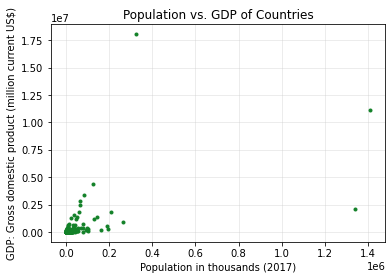

In [7]:
# Plot the Population vs. GDP
_ = plt.plot(data['Population in thousands (2017)'], data['GDP: Gross domestic product (million current US$)'],
             marker='.', linewidth=0, color='#128128')
_ = plt.grid(which='major', color='#cccccc', alpha=0.45)
_ = plt.title('Population vs. GDP of Countries', fontsize=12)
_ = plt.xlabel('Population in thousands (2017)')
_ = plt.ylabel('GDP: Gross domestic product (million current US$)')
_ = plt.show()

In [8]:
# Prepare data for model
dbscan_data = data[['Population in thousands (2017)', 'GDP: Gross domestic product (million current US$)']]
dbscan_data = dbscan_data.values.astype('float32', copy=False)
dbscan_data

array([[3.55300000e+04, 2.02700000e+04],
       [2.93000000e+03, 1.15410000e+04],
       [4.13180000e+04, 1.64779000e+05],
       [5.60000000e+01, 1.51233337e+03],
       [7.70000000e+01, 2.81200000e+03],
       [2.97840000e+04, 1.17955000e+05],
       [1.50000000e+01, 3.20000000e+02],
       [1.02000000e+02, 1.35600000e+03],
       [4.42710000e+04, 6.32343000e+05],
       [2.93000000e+03, 1.05290000e+04],
       [1.05000000e+02, 2.70200000e+03],
       [2.44510000e+04, 1.23085900e+06],
       [8.73600000e+03, 3.76967000e+05],
       [9.82800000e+03, 5.30490000e+04],
       [3.95000000e+02, 8.85400000e+03],
       [1.49300000e+03, 3.11260000e+04],
       [1.64670000e+05, 1.94466000e+05],
       [2.86000000e+02, 4.38500000e+03],
       [9.46800000e+03, 5.46090000e+04],
       [1.14290000e+04, 4.55107000e+05],
       [3.75000000e+02, 1.72100000e+03],
       [1.11760000e+04, 8.47600000e+03],
       [6.10000000e+01, 5.85300000e+03],
       [8.08000000e+02, 2.07400000e+03],
       [1.105200

In [9]:
# normalize data
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[ 2.08537132e-02, -2.04896763e-01],
       [-2.24288985e-01, -2.10813731e-01],
       [ 6.43778145e-02, -1.06941022e-01],
       [-2.45900646e-01, -2.17611670e-01],
       [-2.45742723e-01, -2.16730699e-01],
       [-2.23545674e-02, -1.38680771e-01],
       [-2.46208951e-01, -2.18419909e-01],
       [-2.45554730e-01, -2.17717648e-01],
       [ 8.65835324e-02,  2.09998235e-01],
       [-2.24288985e-01, -2.11499721e-01],
       [-2.45532170e-01, -2.16805264e-01],
       [-6.24572076e-02,  6.15703583e-01],
       [-1.80629522e-01,  3.68910655e-02],
       [-1.72417998e-01, -1.82677448e-01],
       [-2.43351460e-01, -2.12635115e-01],
       [-2.35094815e-01, -1.97537988e-01],
       [ 9.91949618e-01, -8.68176296e-02],
       [-2.44171113e-01, -2.15664446e-01],
       [-1.75125092e-01, -1.81619987e-01],
       [-1.60378933e-01,  8.98584276e-02],
       [-2.43501857e-01, -2.17470244e-01],
       [-1.62281424e-01, -2.12891340e-01],
       [-2.45863050e-01, -2.14669347e-01],
       [-2.

In [18]:
# construct model
model = DBSCAN(eps = 0.02, min_samples = 4, metric='euclidean').fit(dbscan_data)
model

DBSCAN(algorithm='auto', eps=0.02, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [25]:
# separate outliers from clustered data
outliers_df = data[model.labels_ == -1]
clusters_df = data[model.labels_ != -1]

colors = model.labels_
colors_clusters = colors[colors != -1]
colors_outliers = 'black'

# get info about the clusters
clusters = Counter(model.labels_)
print(clusters)
print(data[model.labels_ == -1].head())
print('Number of clusters = {}'.format(len(clusters)-1))

Counter({0: 147, -1: 73, 1: 5, 2: 4})
        country  Surface area (km2)  ...  CentralAsia  Melanesia
0   Afghanistan            652864.0  ...            0          0
2       Algeria           2381741.0  ...            0          0
5        Angola           1246700.0  ...            0          0
8     Argentina           2780400.0  ...            0          0
11    Australia           7692060.0  ...            0          0

[5 rows x 59 columns]
Number of clusters = 3


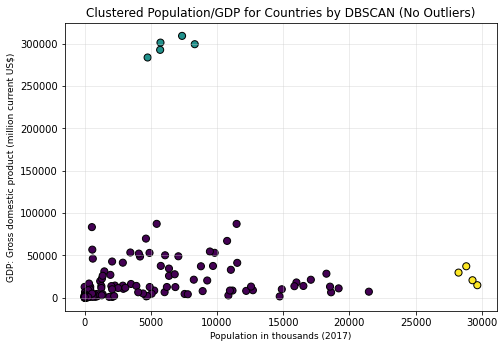

In [34]:
# Plot clusters and outliers
fig = plt.figure()

ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df['Population in thousands (2017)'], clusters_df['GDP: Gross domestic product (million current US$)'],
           c = colors_clusters, edgecolors='black', s=50)
# ax.scatter(outliers_df['Population in thousands (2017)'], outliers_df['GDP: Gross domestic product (million current US$)'],
#            c = colors_outliers, edgecolors='black', s=50)

ax.set_xlabel('Population in thousands (2017)', fontsize=9)
ax.set_ylabel('GDP: Gross domestic product (million current US$)', fontsize=9)

plt.title('Clustered Population/GDP for Countries by DBSCAN (No Outliers)', fontsize = 12)
# plt.title('Clustered Population/GDP for Countries by DBSCAN (Has Outliers)', fontsize = 12)

plt.grid(which='major', color='#cccccc', alpha=0.45)

plt.show()

In [40]:
# exporting clusters as CSVs

# export outliers
# df = data[model.labels_ == -1]
# df.to_csv('DBSCAN_Outliers.csv')
# !cp DBSCAN_Outliers.csv "drive/My Drive/"

# export cluster 0
# df = data[model.labels_ == 0]
# df.to_csv('DBSCAN_cluster_0.csv')
# !cp DBSCAN_cluster_0.csv "drive/My Drive/"

# export cluster 1
df = data[model.labels_ == 2]
df.to_csv('DBSCAN_cluster_2.csv')
!cp DBSCAN_cluster_2.csv "drive/My Drive/"